## **Yolov9 Model Training on Custom Dataset**

Download link: https://universe.roboflow.com/kidney-627pn/kidney-detection/dataset/1

### Mount our Colab with Google drive


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### GPU Check


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = "/content"
print(HOME)

/content


In [ ]:
%cd /content/

/content


#### Clone and install


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git


fatal: destination path 'yolov9' already exists and is not an empty directory.


In [ ]:
%cd yolov9
!pip install -r requirements.txt -q

/content/yolov9


## Download model weights

In [ ]:
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la /content/weights

total 402456
drwxr-xr-x 2 root root      4096 May  3 06:25 .
drwxr-xr-x 1 root root      4096 May  3 06:24 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data image data

In [ ]:
#!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
#SOURCE_IMAGE_PATH = f"{HOME}/Stone-1-_jpg.rf.a010f77c7f193e208a0b317c049a356f.jpg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights /content/weights/gelan-c.pt --conf 0.1 --source /content/Stone950.jpg --device cpu

detect: weights=['/content/weights/gelan-c.pt'], source=/content/Stone950.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/Stone950.jpg: 640x640 1 frisbee, 1 clock, 2319.4ms
Speed: 9.1ms pre-process, 2319.4ms inference, 30.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


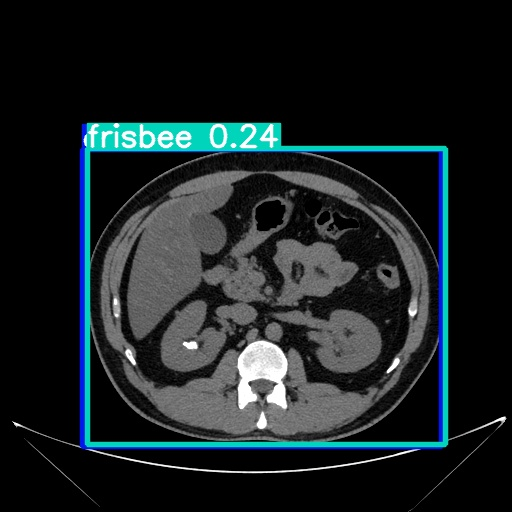

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/detect/exp/Stone950.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights /content/weights/yolov9-e.pt --conf 0.1 --source /content/Stone950.jpg --device cpu

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/Stone950.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/Stone950.jpg: 640x640 1 bird, 1 clock, 6636.3ms
Speed: 3.4ms pre-process, 6636.3ms inference, 4.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


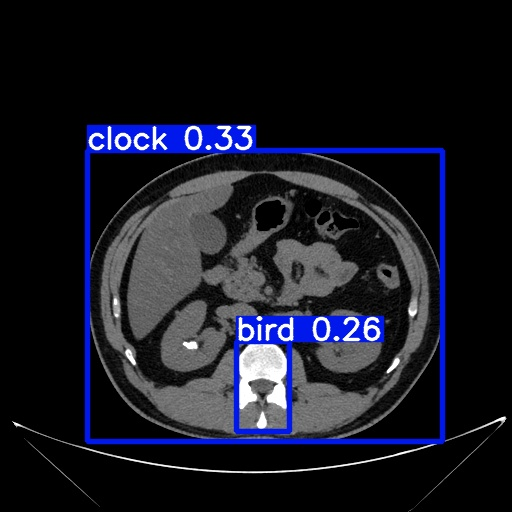

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/detect/exp3/Stone950.jpg", width=600)

In [ ]:
%cd /content/yolov9

/content/yolov9


## Train Custom Model

In [ ]:
!cp -r '/content/drive/MyDrive/YOLOV/dataset' '/content/'

In [ ]:
#%cd {HOME}/yolov9
#%cd {HOME}
"""
!python yolov9/train.py \
--batch 16 --epochs 25 --img 417 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/dataset/data.yaml \
--weights /content/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml
"""
!python train.py \
--batch 3 --epochs 2 --img 417 --device cpu --min-items 0 --close-mosaic 15 \
--data /content/dataset/data.yaml \
--weights /content/weights/gelan-c.pt \
--cfg /content/yolov9/models/detect/gelan-c.yaml \
--hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml



2024-05-03 07:14:28.435551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 07:14:28.435613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 07:14:28.437101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 07:14:29.794889: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=/content/yolov9/models/detect/gelan-c.yaml, data=/content/dataset/data.yaml, hyp=/content/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=2, batch_size=3, imgsz=417, rect=False, resume=False, no

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls /content/yolov9/runs/train/exp2/

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1714720470.bbb49c258337.30010.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


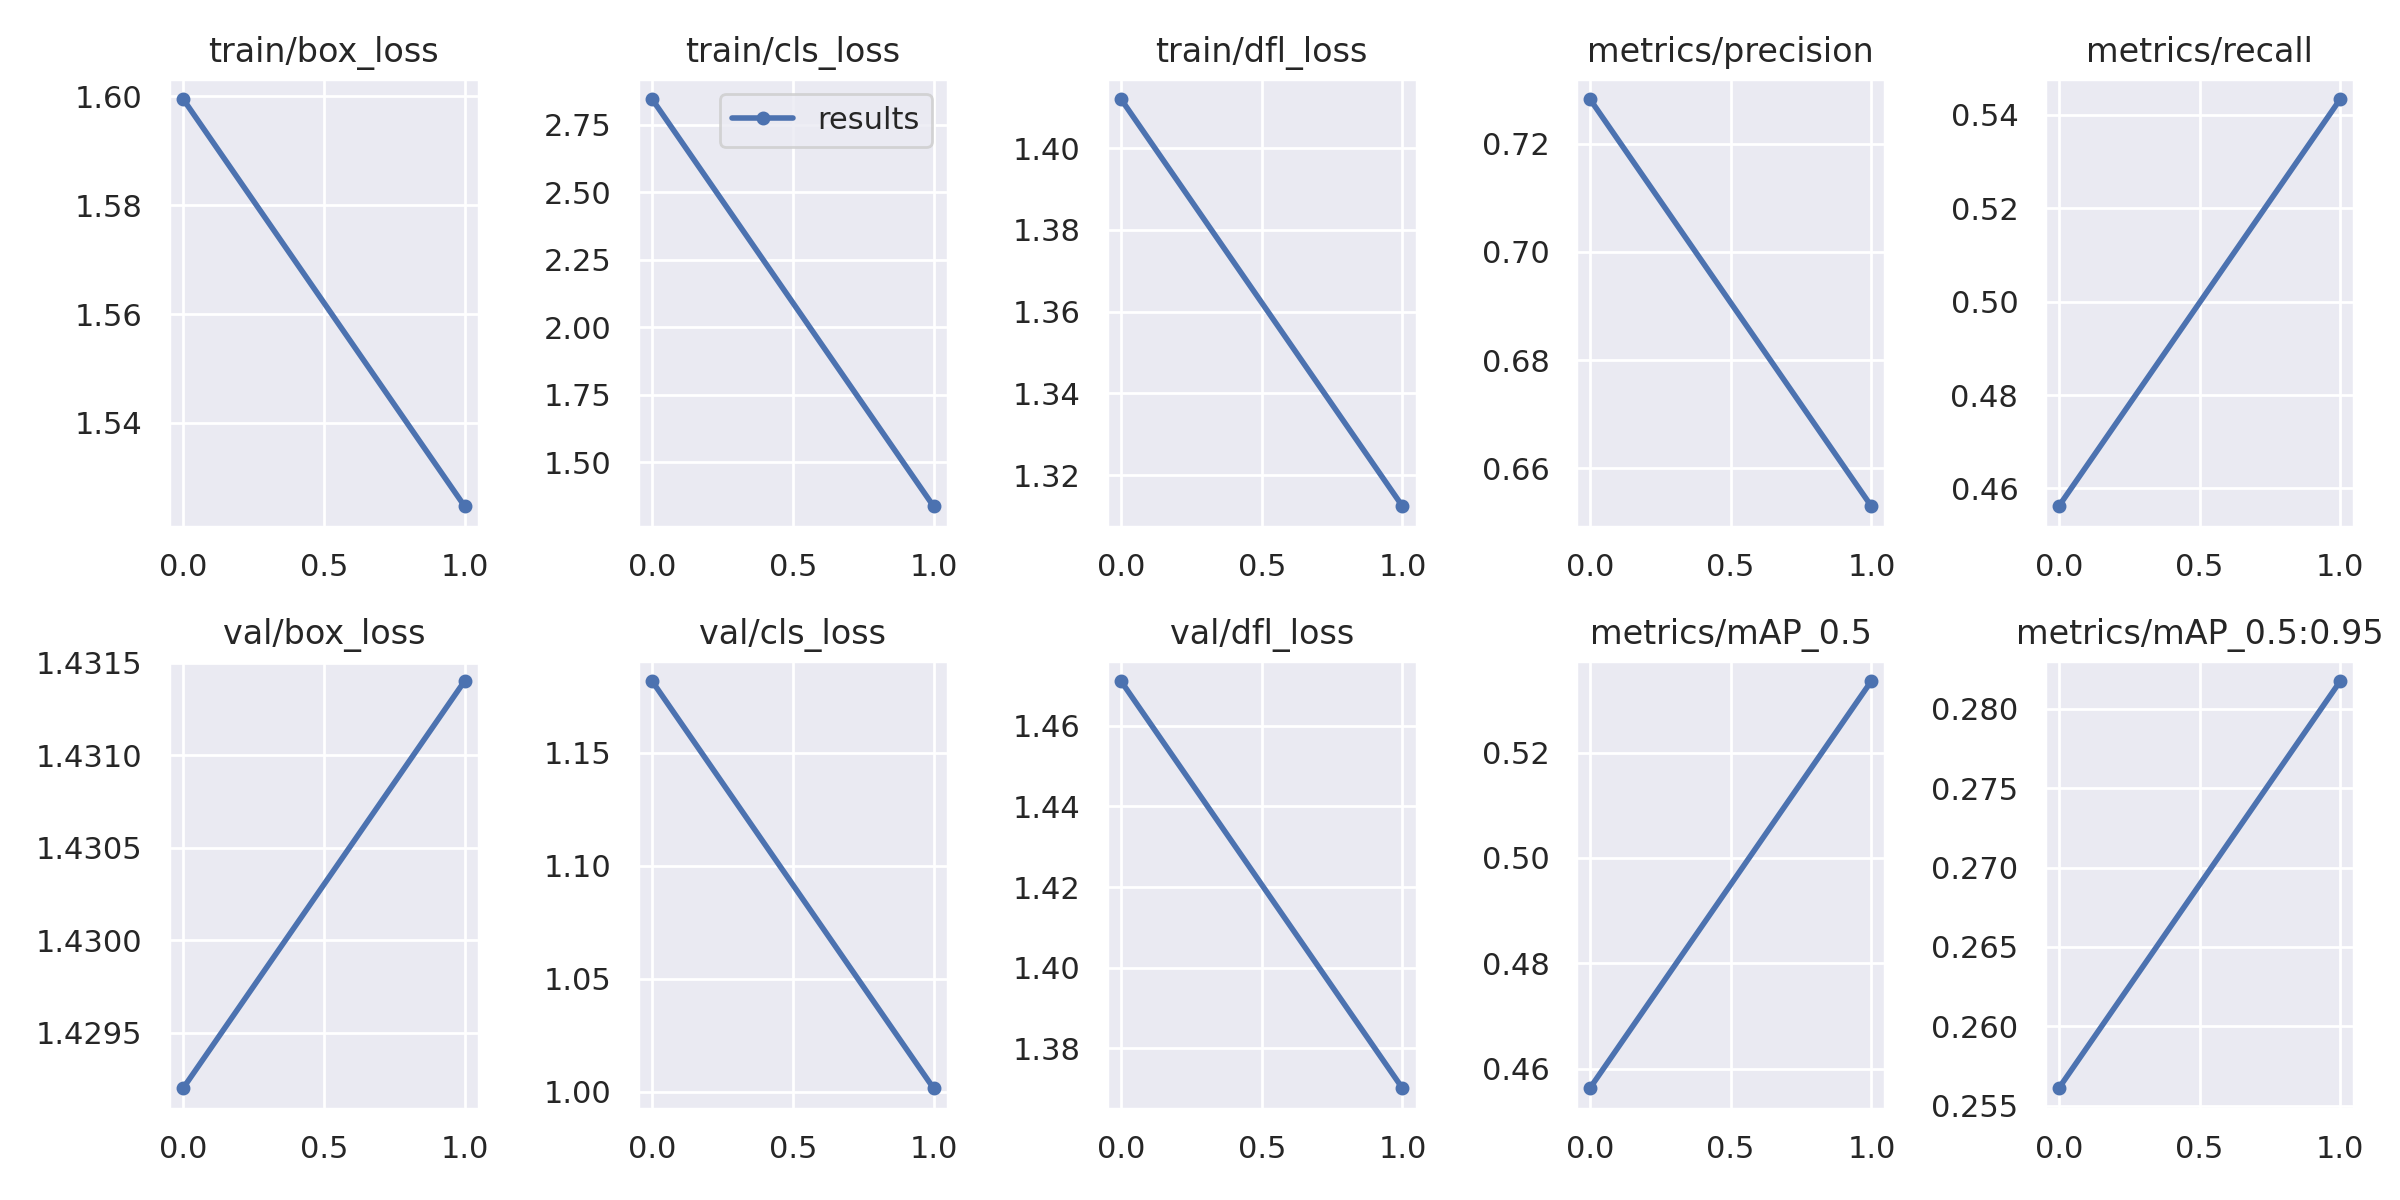

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/train/exp2/results.png", width=1000)

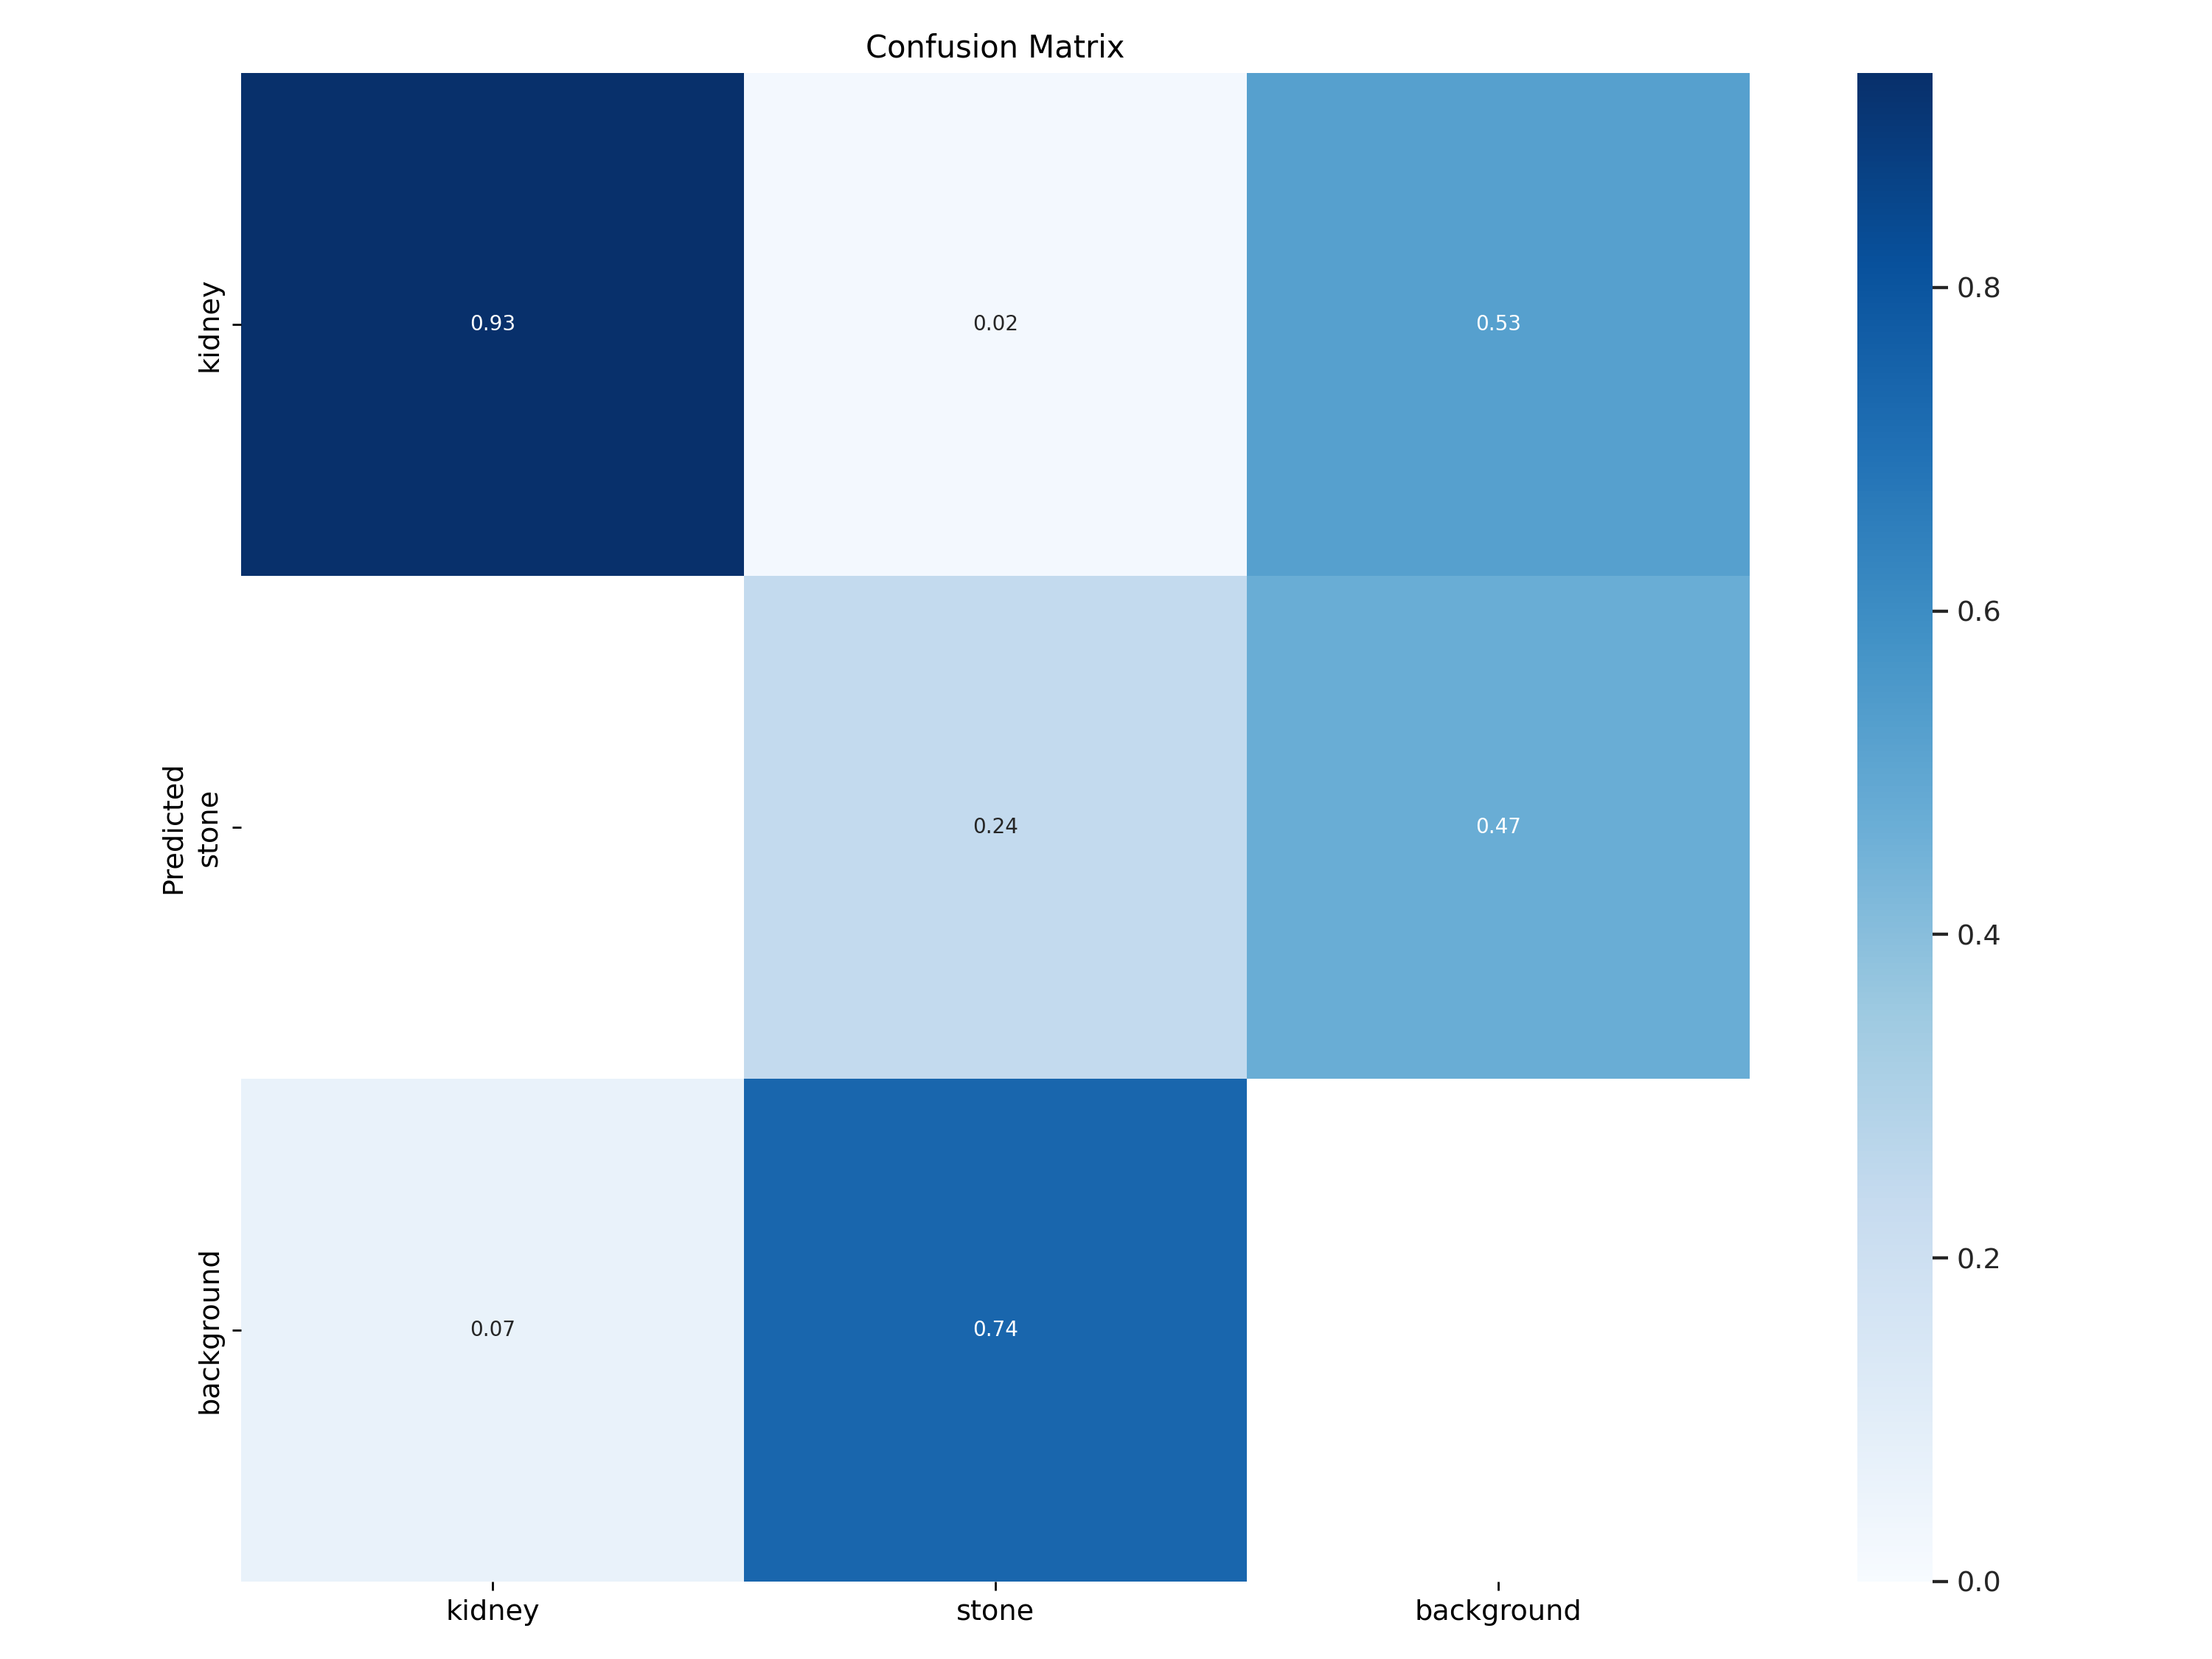

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

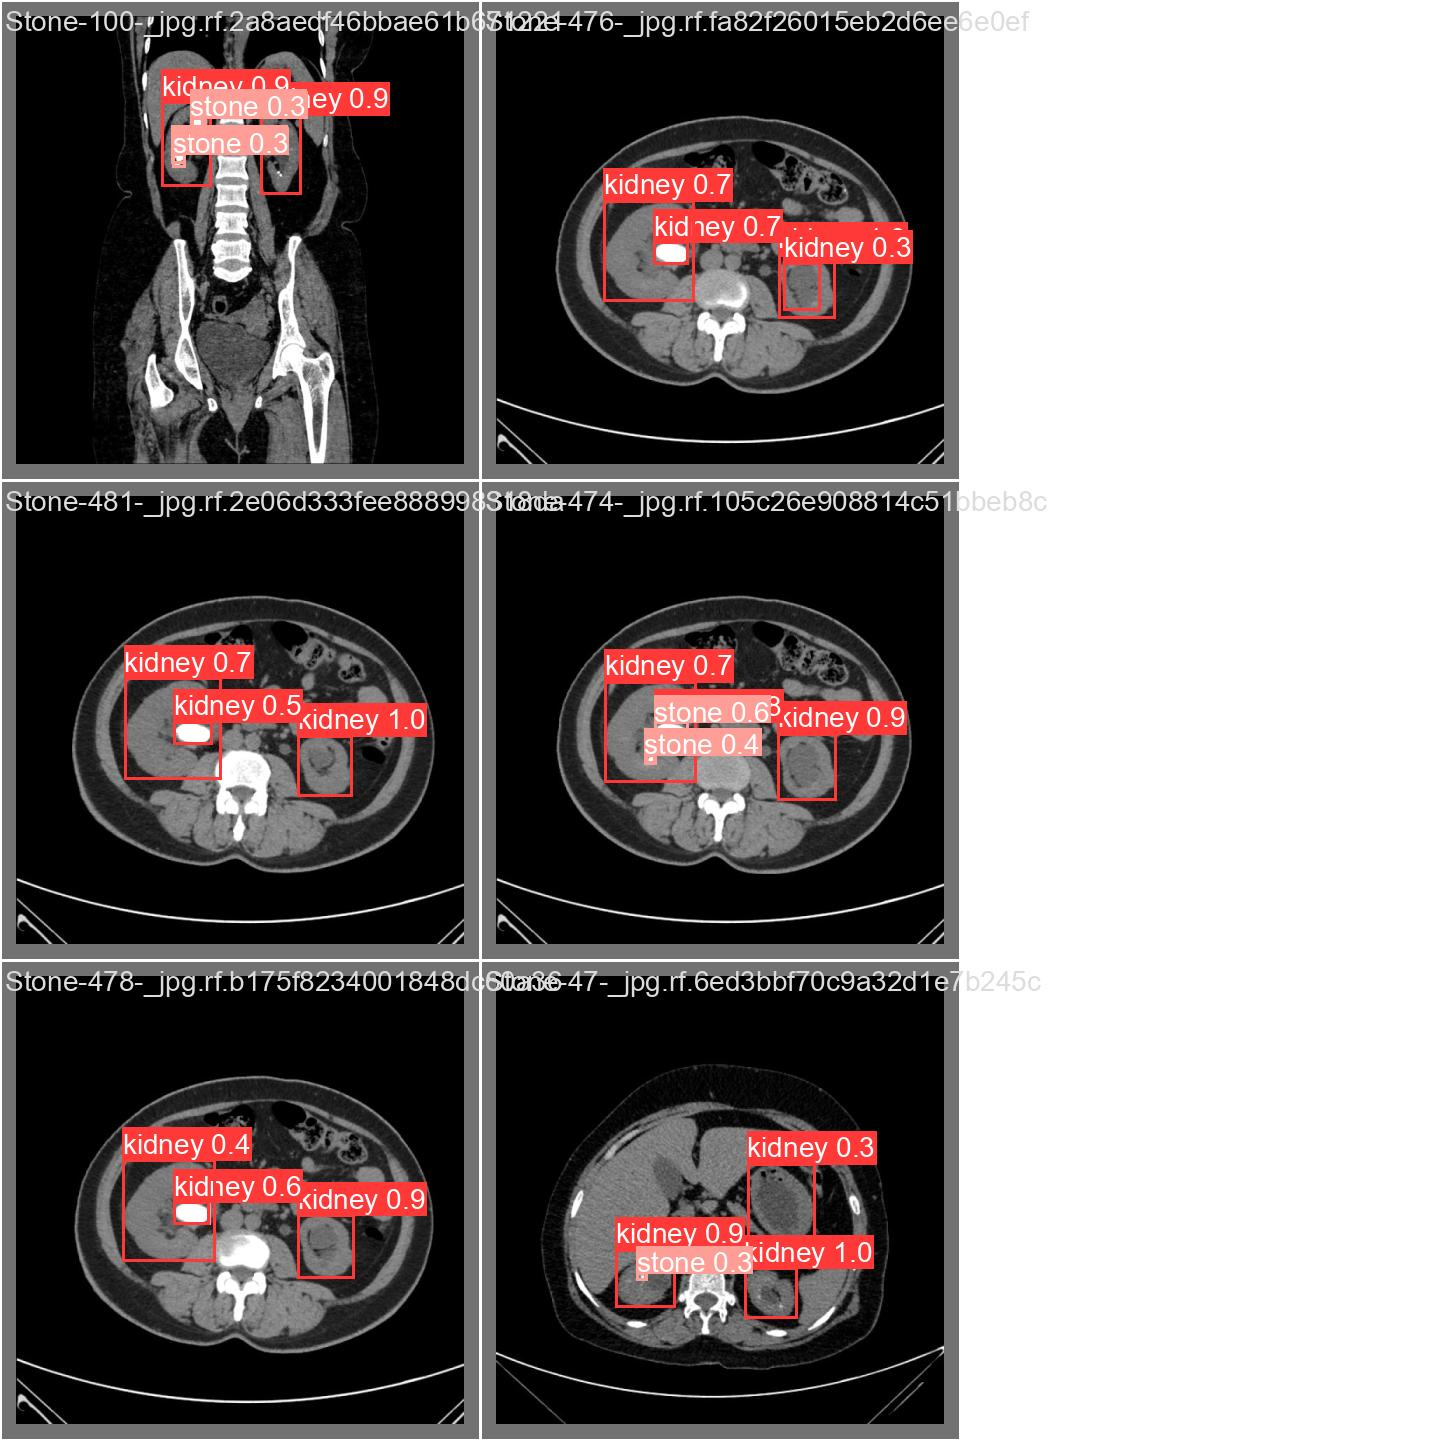

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

---------------------------------------

-------------------------------------------


## Validate Custom Model

In [ ]:
#%cd {HOME}/yolov9
%cd {HOME}

!python yolov9/val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/dataset/data.yaml \
--weights /content/yolov9/runs/train/exp4/weights/best.pt

/content/drive/MyDrive/yolov9
val: data=/content/drive/MyDrive/Aquarium_dataset/data.yaml, weights=['/content/drive/MyDrive/yolov9/yolov9/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov9/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Aquarium_dataset/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:13<00:00,  3.32s/it]
                   all        127        909      0.822       0.71        0.8      0.519
     

## Inference with Custom Model

In [ ]:
!python yolov9/detect.py \
--img 1280 --conf 0.25 --device 0 \
--weights /contnet/yolov9/runs/train/exp4/weights/best.pt \
--source /content/dataset/test/images

detect: weights=['/content/drive/MyDrive/yolov9/yolov9/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Aquarium_dataset/test/images, data=yolov9/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients
image 1/63 /content/drive/MyDrive/Aquarium_dataset/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 1280x960 1 fish, 1 penguin, 1 shark, 108.0ms
image 2/63 /content/drive/MyDrive/Aquarium_dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f00

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp4/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))